# Identifying Age-Related Conditions Using Machine Learning Models
## Author: Boni M. Ale, MD, MSc, MPH
### Date: 10 July 2023

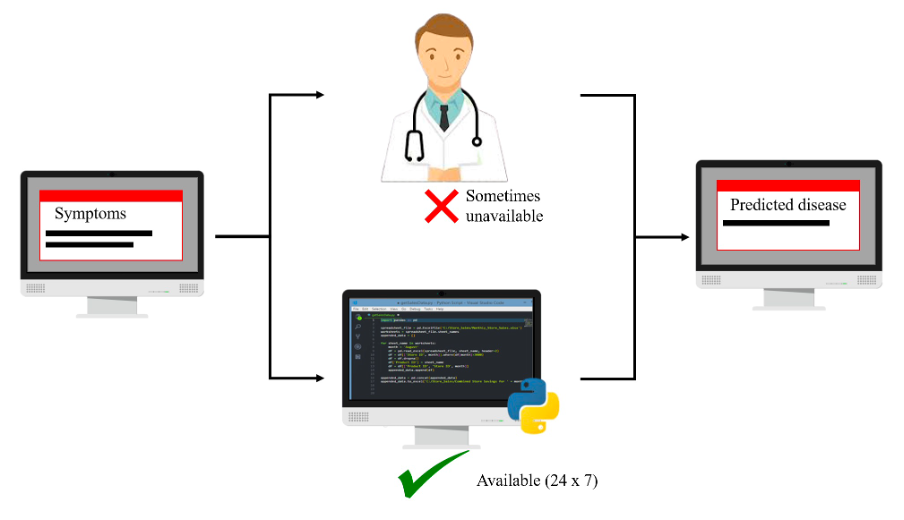

# Outline 

Introduction
1. Exploratory data analysis (EDA)
2. Data Wrangling
3. Data Modelling

Conclusion

# 1. Introduction

Machine learning can be a powerful tool for disease prediction. By analyzing large amounts of data and identifying patterns, machine learning models can learn to recognize subtle indicators and make predictions about disease risk or diagnosis. To determine if someone has these medical conditions requires a long and intrusive process to collect information from patients. With predictive models, we can shorten this process and keep patient details private by collecting key characteristics relative to the conditions, then encoding these characteristics.

In this project, I will use Machine Learning to detect conditions with measurements of anonymous characteristics. Therefore the general objective of this analysis is to predict if a person has any of three medical conditions. In order to predict if the person has one or more of any of the three medical conditions (Class 1), or none of the three medical conditions (Class 0), I will create models trained on anonymous measurements of health characteristics.

**Load Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

**Load Datasets**

In [2]:
train_raw = pd.read_csv('/Users/boniale/Desktop/Data_Science/ML_iard/data/train.csv')
test = pd.read_csv('/Users/boniale/Desktop/Data_Science/ML_iard/data/test.csv')
greeks_raw = pd.read_csv('/Users/boniale/Desktop/Data_Science/ML_iard/data/greeks.csv')
sample_submission = pd.read_csv('/Users/boniale/Desktop/Data_Science/ML_iard/data/sample_submission.csv')

# 2. Exploratory Data Analysis

## 2.1. Data Description

### → Train Data 

In [3]:
print("Raw Train Data Set's size: ", train_raw.shape)

#separate variables into new data frames
numeric_data = train_raw.select_dtypes(include=[np.number])
cat_data = train_raw.select_dtypes(exclude=[np.number])
cat_data = cat_data.drop(['Id'], axis=1)
print ("There are {} numeric and {} categorical columns in train raw data".format(numeric_data.shape[1],cat_data.shape[1]))

Raw Train Data Set's size:  (617, 58)
There are 56 numeric and 1 categorical columns in train raw data


In [4]:
train_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
AB,617.0,0.477149,0.468388,0.081187,0.252107,0.354659,0.559763,6.161666
AF,617.0,3502.013221,2300.322717,192.593280,2197.345480,3120.318960,4361.637390,28688.187660
AH,617.0,118.624513,127.838950,85.200147,85.200147,85.200147,113.739540,1910.123198
AM,617.0,38.968552,69.728226,3.177522,12.270314,20.533110,39.139886,630.518230
AR,617.0,10.128242,10.518877,8.138688,8.138688,8.138688,8.138688,178.943634
AX,617.0,5.545576,2.551696,0.699861,4.128294,5.031912,6.431634,38.270880
AY,617.0,0.060320,0.416817,0.025578,0.025578,0.025578,0.036845,10.315851
AZ,617.0,10.566447,4.350645,3.396778,8.129580,10.461320,12.969516,38.971568
BC,617.0,8.053012,65.166943,1.229900,1.229900,1.229900,5.081244,1463.693448
BD,617.0,5350.388655,3021.326641,1693.624320,4155.702870,4997.960730,6035.885700,53060.599240


It seems like there is 56 numeric variables which include our target ("if the person has one or more of any of the three medical conditions (Class 1)" or "none of the three medical conditions (Class 0)"). Therefore Class is actually a binary categorical variable. 

### → Test Data

In [5]:
print("Raw Test Data Set's size: ", test.shape)

#separate variables into new data frames
numtest_data = test.select_dtypes(include=[np.number])
cattest_data = test.select_dtypes(exclude=[np.number])
cattest_data = cattest_data.drop(['Id'], axis=1)
print ("There are {} numeric and {} categorical columns in test raw data".format(numtest_data.shape[1],cattest_data.shape[1]))

Raw Test Data Set's size:  (5, 57)
There are 55 numeric and 1 categorical columns in test raw data


In [6]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
AB,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AF,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AH,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AM,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AR,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AX,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AY,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZ,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BC,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BD,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In the test dataset all values are the same apart from the Id.  

### → Greek Data

In [7]:
print("Raw Greek Data Set's size: ", greeks_raw.shape)

#separate variables into new data frames
numgreeks_data = greeks_raw.select_dtypes(include=[np.number])
catgreeks_data = greeks_raw.select_dtypes(exclude=[np.number])
catgreeks_data = catgreeks_data.drop(['Id'], axis=1)
print ("There are {} numeric and {} categorical columns in test raw data".format(numgreeks_data.shape[1],catgreeks_data.shape[1]))

Raw Greek Data Set's size:  (617, 6)
There are 0 numeric and 5 categorical columns in test raw data


In [8]:
greeks_raw.describe().T

,count,unique,top,freq
Id,617,617,000ff2bfdfe9,1
Alpha,617,4,A,509
Beta,617,3,C,407
Gamma,617,8,M,445
Delta,617,4,B,456
Epsilon,617,198,Unknown,144


### → Data Augmentation

In [9]:
df_train_greeks = train_raw.merge(greeks_raw, on ='Id',how ='left')
df_train_greeks.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,GF,GH,GI,GL,Class,Alpha,Beta,Gamma,Delta,Epsilon
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,2003.810319,22.136229,69.834944,0.120343,1,B,C,G,D,3/19/2019
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,27981.562750,29.135430,32.131996,21.978000,0,A,C,M,B,Unknown
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,13676.957810,28.022851,35.192676,0.196941,0,A,C,M,B,Unknown
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,2094.262452,39.948656,90.493248,0.155829,0,A,C,M,B,Unknown
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8524.370502,45.381316,36.262628,0.096614,1,D,B,F,B,3/25/2020


In [10]:
df_train_greeks.dtypes.head(60)

Id        object
AB       float64
AF       float64
AH       float64
AM       float64
AR       float64
AX       float64
AY       float64
AZ       float64
BC       float64
BD       float64
BN       float64
BP       float64
BQ       float64
BR       float64
BZ       float64
CB       float64
CC       float64
CD       float64
CF       float64
CH       float64
CL       float64
CR       float64
CS       float64
CU       float64
CW       float64
DA       float64
DE       float64
DF       float64
DH       float64
DI       float64
DL       float64
DN       float64
DU       float64
DV       float64
DY       float64
EB       float64
EE       float64
EG       float64
EH       float64
EJ        object
EL       float64
EP       float64
EU       float64
FC       float64
FD       float64
FE       float64
FI       float64
FL       float64
FR       float64
FS       float64
GB       float64
GE       float64
GF       float64
GH       float64
GI       float64
GL       float64
Class      int64
Alpha     obje

In [11]:
df_train_greeks.describe().T

,count,mean,std,min,25%,50%,75%,max
AB,617.0,0.477149,0.468388,0.081187,0.252107,0.354659,0.559763,6.161666
AF,617.0,3502.013221,2300.322717,192.593280,2197.345480,3120.318960,4361.637390,28688.187660
AH,617.0,118.624513,127.838950,85.200147,85.200147,85.200147,113.739540,1910.123198
AM,617.0,38.968552,69.728226,3.177522,12.270314,20.533110,39.139886,630.518230
AR,617.0,10.128242,10.518877,8.138688,8.138688,8.138688,8.138688,178.943634
AX,617.0,5.545576,2.551696,0.699861,4.128294,5.031912,6.431634,38.270880
AY,617.0,0.060320,0.416817,0.025578,0.025578,0.025578,0.036845,10.315851
AZ,617.0,10.566447,4.350645,3.396778,8.129580,10.461320,12.969516,38.971568
BC,617.0,8.053012,65.166943,1.229900,1.229900,1.229900,5.081244,1463.693448
BD,617.0,5350.388655,3021.326641,1693.624320,4155.702870,4997.960730,6035.885700,53060.599240


## 2.2. Numerical Variables Exploration

Let's work on numeriacal features.

In [12]:
Target = ['Class']
allFeature = df_train_greeks.columns.tolist()
included_features = [feature for feature in allFeature if feature not in Target]

numericalFeatures = df_train_greeks[included_features].select_dtypes(include=['number'])
categoricalFeatures = df_train_greeks[included_features].select_dtypes(include=['object', ])

In [22]:
num_cols = ['AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN',
       'BP', 'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS',
       'CU', 'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY',
       'EB', 'EE', 'EG', 'EH', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI',
       'FL', 'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL','Class']
num_cnt_cols = ['AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN',
       'BP', 'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS',
       'CU', 'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY',
       'EB', 'EE', 'EG', 'EH', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI',
       'FL', 'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL']
nominal_cols = ['EJ', 'Alpha','Beta', 'Gamma', 'Delta']

In [13]:
numericalFeatures.head(10)

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,...,3.583450,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343
1,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,...,10.358927,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000
2,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,...,11.626917,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941
3,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,...,14.852022,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829
4,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,...,13.666727,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614
5,0.209377,2615.81430,85.200147,8.541526,8.138688,4.013127,0.025578,12.547282,1.229900,5237.54088,...,10.981896,0.173229,0.49706,1.164956,21.915512,72.611063,24177.595550,28.525186,82.527764,21.978000
6,0.348249,1733.65412,85.200147,8.377385,15.312480,1.913544,0.025578,6.547778,1.229900,5710.46099,...,10.777915,4.408484,0.86130,0.467337,17.878444,192.453107,3332.467494,34.166222,100.086808,0.065096
7,0.269199,966.45483,85.200147,21.174189,8.138688,4.987617,0.025578,9.408886,1.229900,5040.77914,...,10.342388,6.591896,0.49706,0.277693,18.445866,109.693986,21371.759850,35.208102,31.424696,0.092873
8,0.346113,3238.43674,85.200147,28.888816,8.138688,4.021986,0.025578,8.243016,3.626448,6569.37001,...,11.450501,4.762291,1.18262,0.067730,17.245908,147.218610,4589.611956,29.771721,54.675576,0.073416
9,0.324748,5188.68207,85.200147,12.968687,8.138688,4.593392,0.025578,10.685041,1.229900,4951.69863,...,12.329825,0.173229,1.57151,0.318331,24.515421,98.929757,5563.130949,21.994831,33.300970,21.978000


In [14]:
categoricalFeatures.head(10)

,Id,EJ,Alpha,Beta,Gamma,Delta,Epsilon
0,000ff2bfdfe9,B,B,C,G,D,3/19/2019
1,007255e47698,A,A,C,M,B,Unknown
2,013f2bd269f5,B,A,C,M,B,Unknown
3,043ac50845d5,B,A,C,M,B,Unknown
4,044fb8a146ec,B,D,B,F,B,3/25/2020
5,04517a3c90bd,A,A,C,M,B,10/1/2019
6,049232ca8356,B,A,C,M,B,5/29/2019
7,057287f2da6d,B,A,C,M,B,4/24/2019
8,0594b00fb30a,B,A,C,M,B,2/18/2019
9,05f2bc0155cd,A,A,B,M,B,6/19/2020


There is actually 56 numeric variables and 5 categorical variables ap.

Let's explore the overall distribution of these variables.

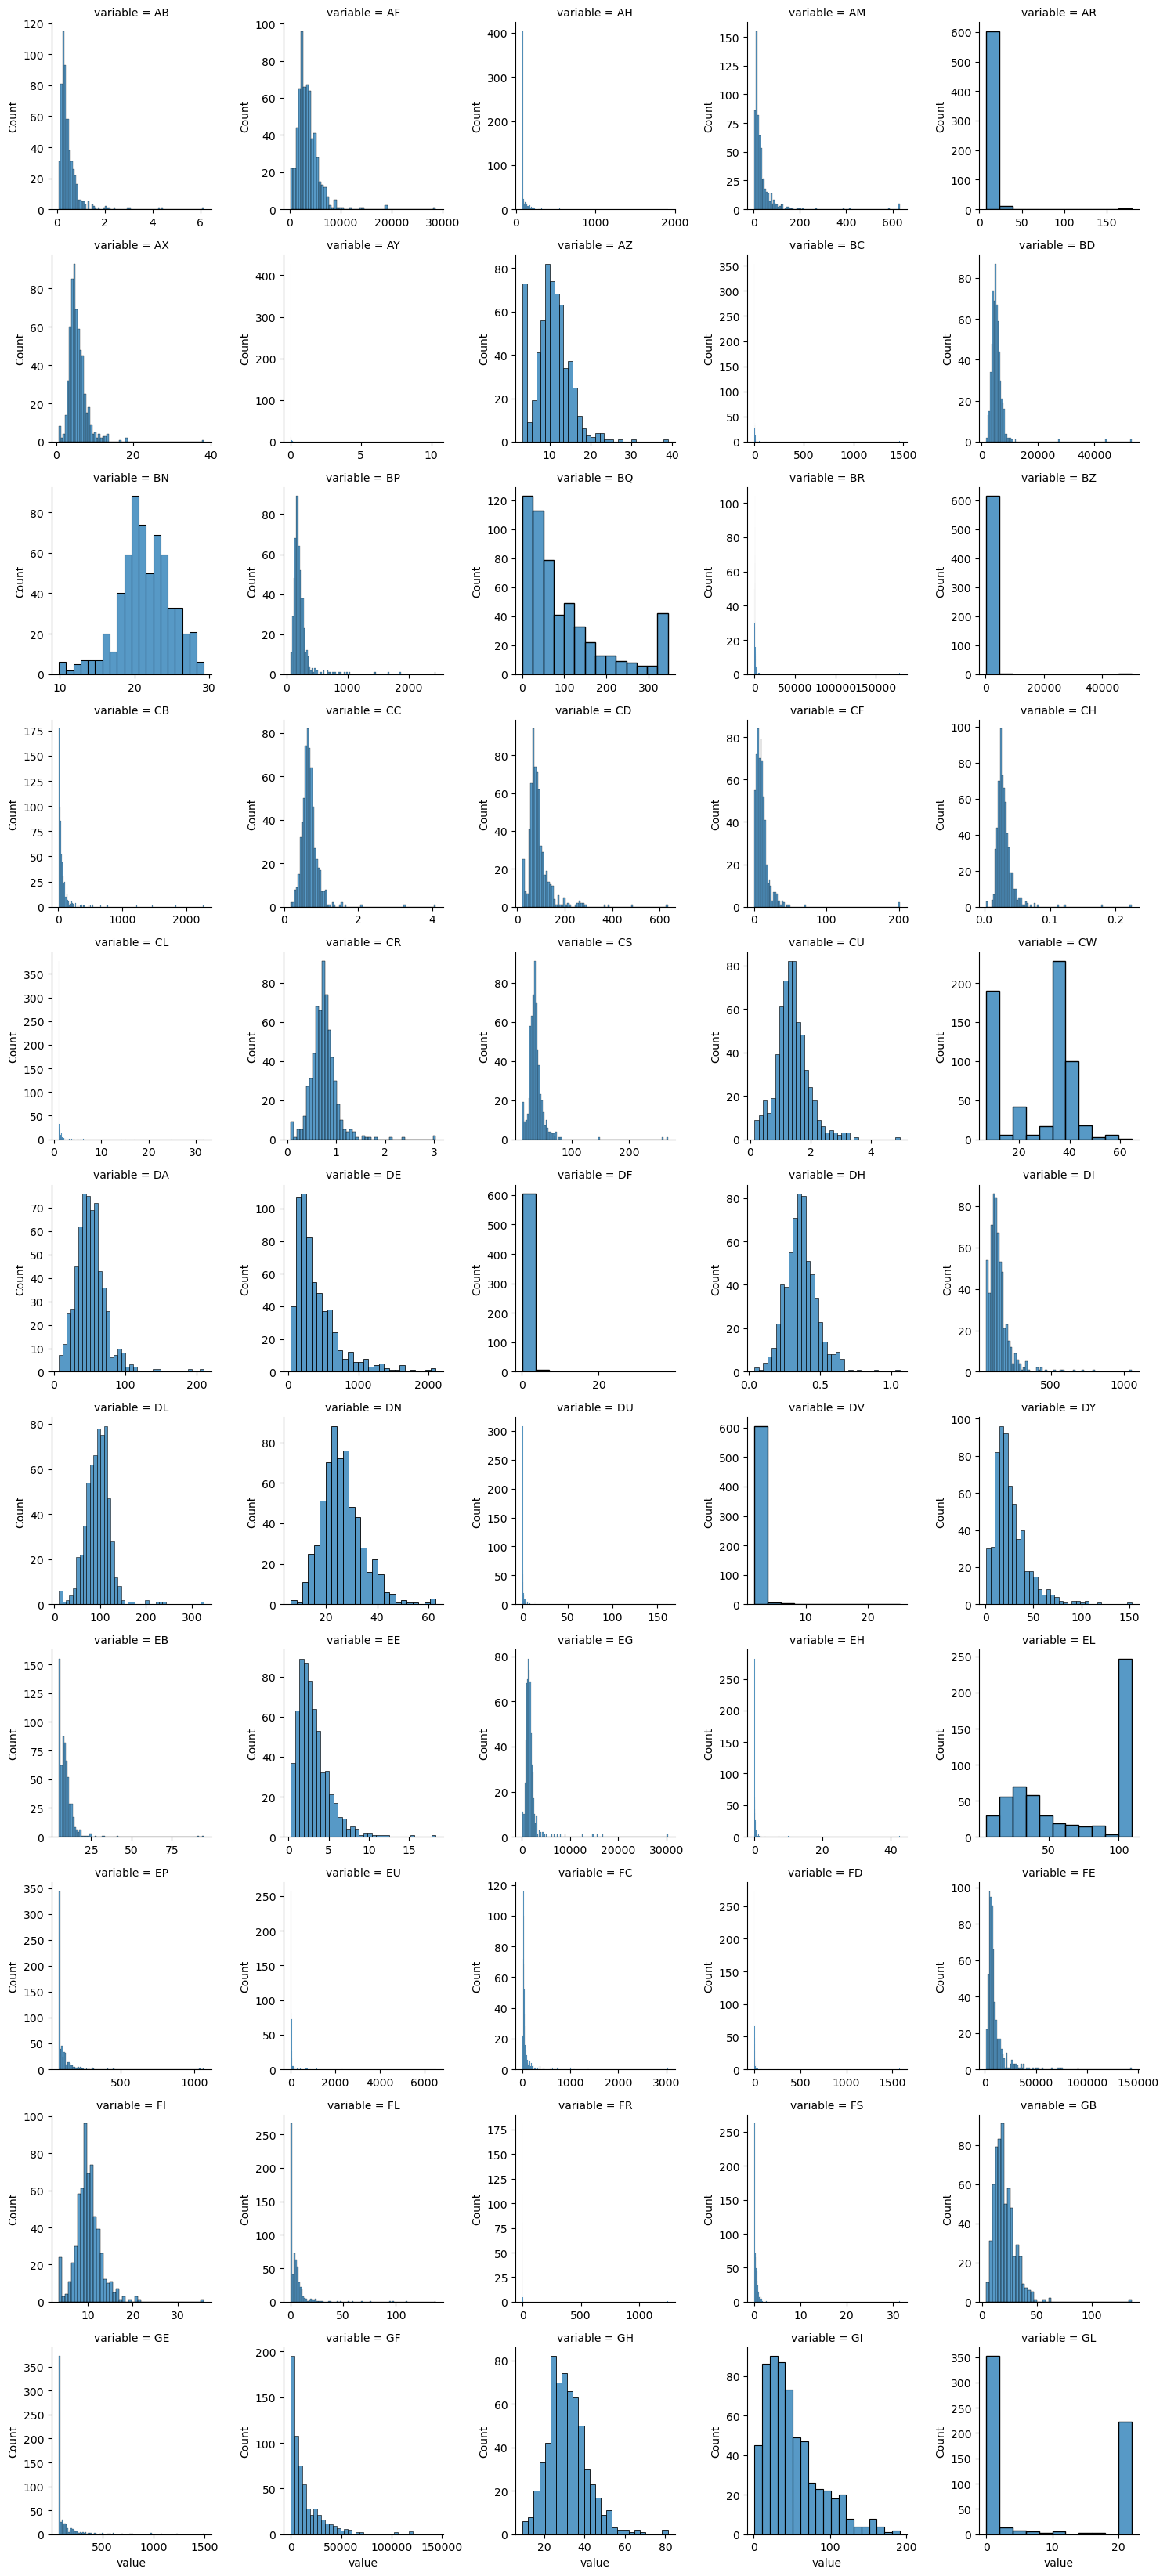

In [15]:
num = [f for f in df_train_greeks.columns if df_train_greeks.dtypes[f] != 'object']
num.remove("Class")
nd = pd.melt(df_train_greeks, value_vars = num)
barplot_train = sns.FacetGrid (nd, col='variable',
                    col_wrap=5, 
                    sharex=False, 
                              sharey = False
                   )
barplot_train = barplot_train.map(sns.histplot, 'value')
plt.show("barplot_train")

We can see that several variables are not normally distributed.

The distribution of the data confirmed the imbalance distribution of features among those who have the diseases and those who doesn't.

Are these variables highly correlated among each other ? Let's explore this visually with a heatmap. 

In [16]:
# Define Display a correlation heatmap Function
def display_correlation_heatmap(df, title):
    corr_mat = np.round(df.corr(), 3)
    
    fig, ax = plt.subplots(figsize=(5, 5))
    sns.heatmap(corr_mat, annot=True, fmt=".3f", cmap='coolwarm', cbar=False, square=True, linewidths=.5, annot_kws={"size": 12}, ax=ax)

    ax.set_title(title, fontsize=16, pad=20, y=1.05)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=12)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=12)

    plt.tight_layout()
    plt.show()
       
def plot_correlation_heatmap(df, column_name):
    correlation_matrix = df.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title(f'Correlation heatmap for {column_name}')
    plt.show()

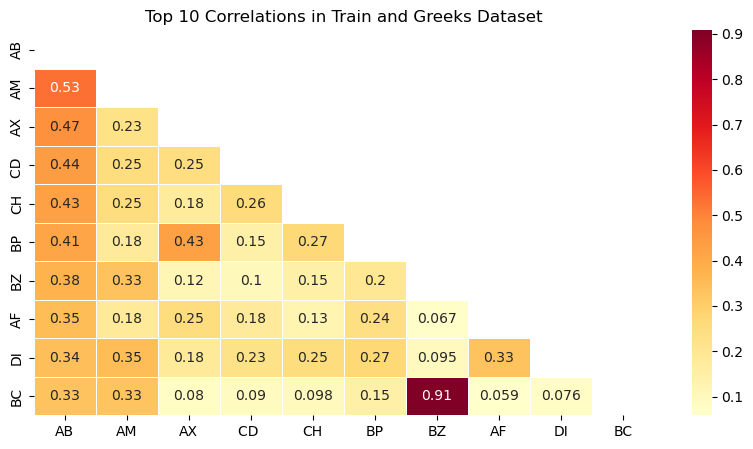

In [17]:
# Display a correlation heatmap
def plot_top_correlations(df: pd.core.frame.DataFrame, n: int, title_name: str='Top Correlations') -> None:
    # Calculate correlation between all variables
    corr = df.corr()

    # Select variables having highest absolute correlation
    top_corr_cols = corr.abs().nlargest(n, columns=corr.columns).index
    top_corr = corr.loc[top_corr_cols, top_corr_cols]

    fig, axes = plt.subplots(figsize=(10, 5))
    mask = np.zeros_like(top_corr)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(top_corr, mask=mask, linewidths=.5, cmap='YlOrRd', annot=True)
    plt.title(title_name)
    plt.show()

# Plot heatmap of top 12 correlations in training data
plot_top_correlations(numericalFeatures, 10, 'Top 10 Correlations in Train and Greeks Dataset')

We can see that some variables are correlate but not highly correlated in general apart from variable BZ and BC which are highly correlated.

## Numerical Variables distribution in Target group

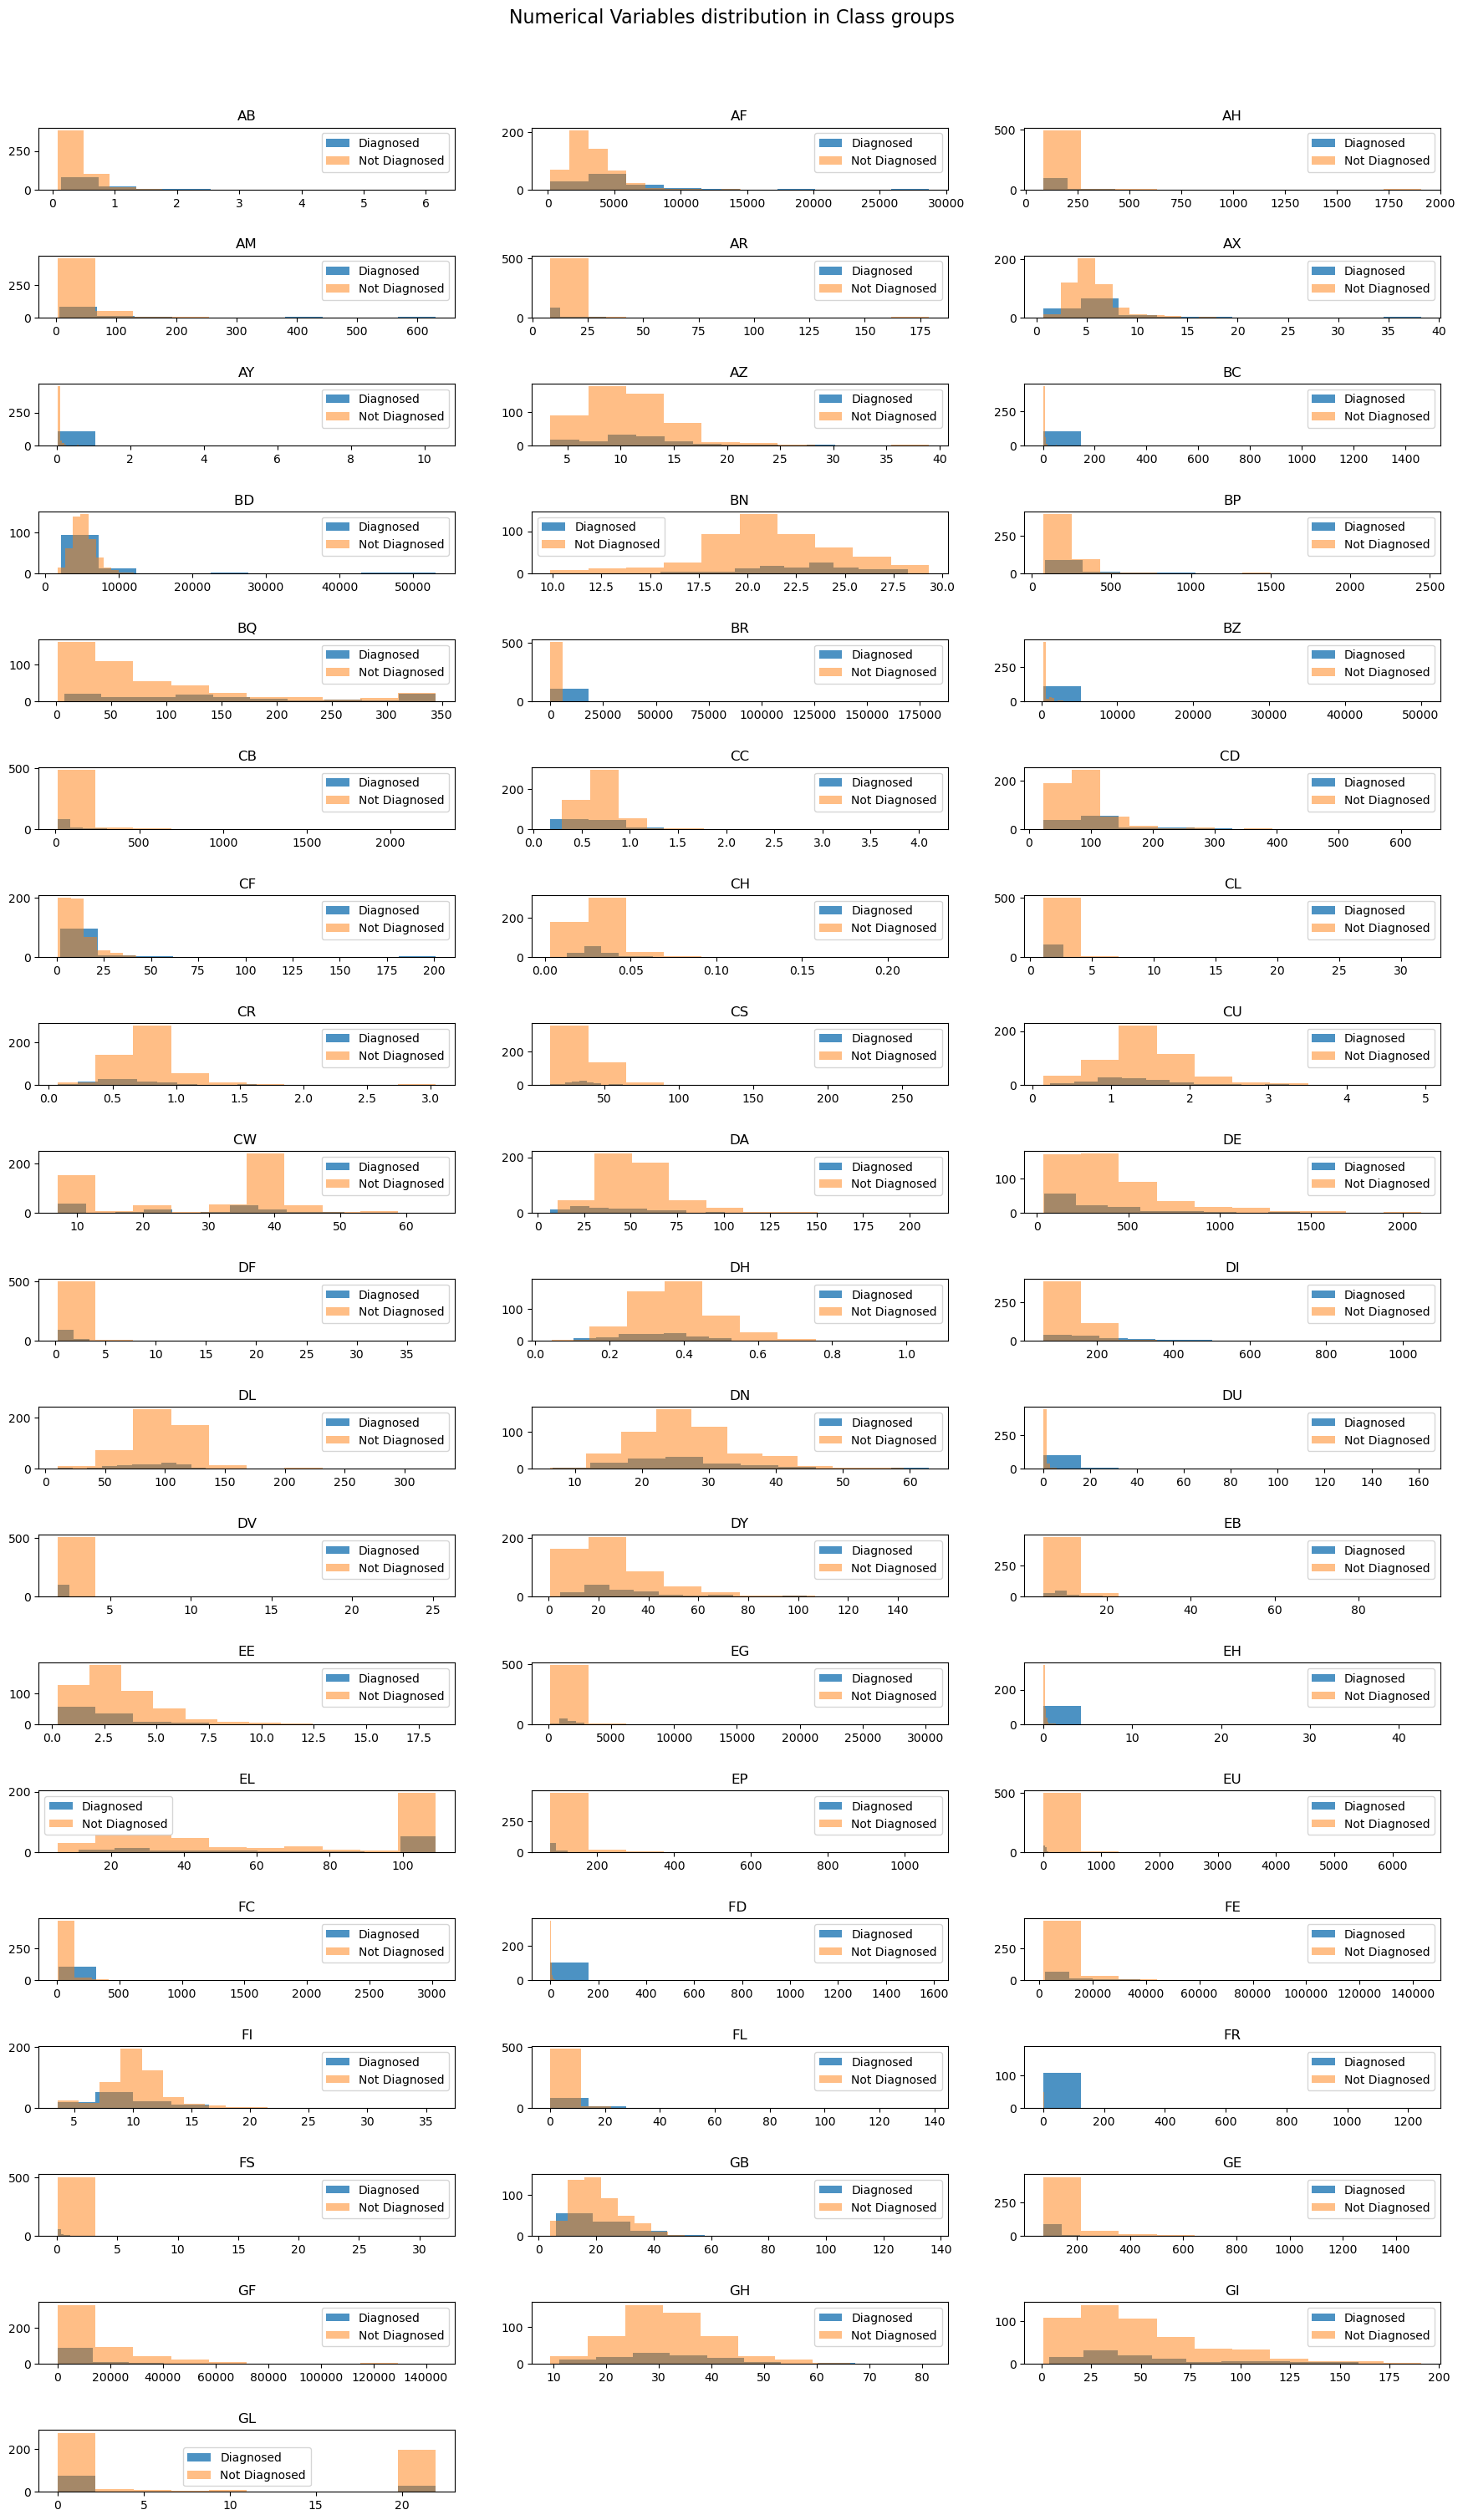

	 Class Rate

AB
(0.132, 0.735]    0.146435
(0.735, 1.338]    0.295082
(1.338, 1.941]    0.500000
(1.941, 2.544]    0.833333
(2.544, 3.147]    0.500000
(3.147, 3.75]          NaN
(3.75, 4.353]     0.000000
(4.353, 4.956]    1.000000
(4.956, 5.559]         NaN
(5.559, 6.162]    1.000000
Name: Class, dtype: float64 

AF
(192.593, 3042.153]       0.096429
(3042.153, 5891.712]      0.206107
(5891.712, 8741.272]      0.380952
(8741.272, 11590.831]     0.625000
(11590.831, 14440.39]     1.000000
(14440.39, 17289.95]      0.000000
(17289.95, 20139.509]     1.000000
(20139.509, 22989.069]         NaN
(22989.069, 25838.628]         NaN
(25838.628, 28688.188]    1.000000
Name: Class, dtype: float64 

AH
(85.2, 200.474]         0.117347
(200.474, 315.748]      0.388889
(315.748, 431.022]      0.333333
(431.022, 546.296]      0.500000
(546.296, 661.57]       0.000000
(661.57, 776.845]            NaN
(776.845, 892.119]      1.000000
(892.119, 1007.393]          NaN
(1007.393, 1122.667]         NaN


In [25]:
##  Distribution on target
i=1
f= plt.figure(figsize =(18,30))
Class_rates =[]

for col in num_cnt_cols:
    plt.subplot(19,3,i)
    n,bins,patchs = plt.hist(df_train_greeks[col].loc[df_train_greeks['Class'] ==1],
                            label =['Diagnosed'],alpha =0.8)
    plt.hist(df_train_greeks[col].loc[df_train_greeks['Class'] ==0],
                            label =['Not Diagnosed'],alpha =0.5)
    plt.title(col)
    plt.legend()
    i+=1
    
    #Survival rate
    Class_rates.append(pd.concat([pd.cut(df_train_greeks[col],bins),df_train_greeks['Class']],axis = 1).groupby([col]).Class.mean())


f.suptitle('Numerical Variables distribution in Class groups',fontsize=16, y=1.01)
plt.tight_layout(pad =2.5)
plt.show()

print('\t Class Rate\n')
for cl in Class_rates:
    print(cl,'\n')

**Let's see if we can exclude some columns from models which have not significant mean of diagnosed**

In [26]:
mean_per_class ={}
for col in num_cnt_cols:
    mean_per_class.update({col:df_train_greeks[df_train_greeks['Class'] ==1][col].mean()/(df_train_greeks[df_train_greeks['Class'] ==0][col].mean() + df_train_greeks[df_train_greeks['Class'] ==1][col].mean())})

In [27]:
pr = pd.DataFrame(data = mean_per_class.values(),index = num_cnt_cols)
pr.rename(columns = {0:'Class1_percentage'},inplace =True)
pr.sort_values(by ='Class1_percentage',ascending =False).T

,FR,DU,BC,FD,EH,AY,BR,FL,AM,BZ,...,EP,DH,GE,DA,CR,EE,DE,GL,GF,EU
Class1_percentage,0.92938,0.906085,0.899074,0.89344,0.870828,0.751835,0.74617,0.735579,0.705995,0.704574,...,0.469556,0.455731,0.445469,0.439837,0.438828,0.435226,0.429058,0.391896,0.370135,0.317557


## 2.3. Categorical Variables Distribution in Class Groups

EJ
A    0.126126
B    0.202532
Name: Class, dtype: float64 

Alpha
A    0.0
B    1.0
D    1.0
G    1.0
Name: Class, dtype: float64 

Beta
A    1.000000
B    0.267327
C    0.113022
Name: Class, dtype: float64 

Gamma
A    1.0
B    1.0
E    1.0
F    1.0
G    1.0
H    1.0
M    0.0
N    0.0
Name: Class, dtype: float64 

Delta
A    0.306667
B    0.118421
C    0.312500
D    0.500000
Name: Class, dtype: float64 



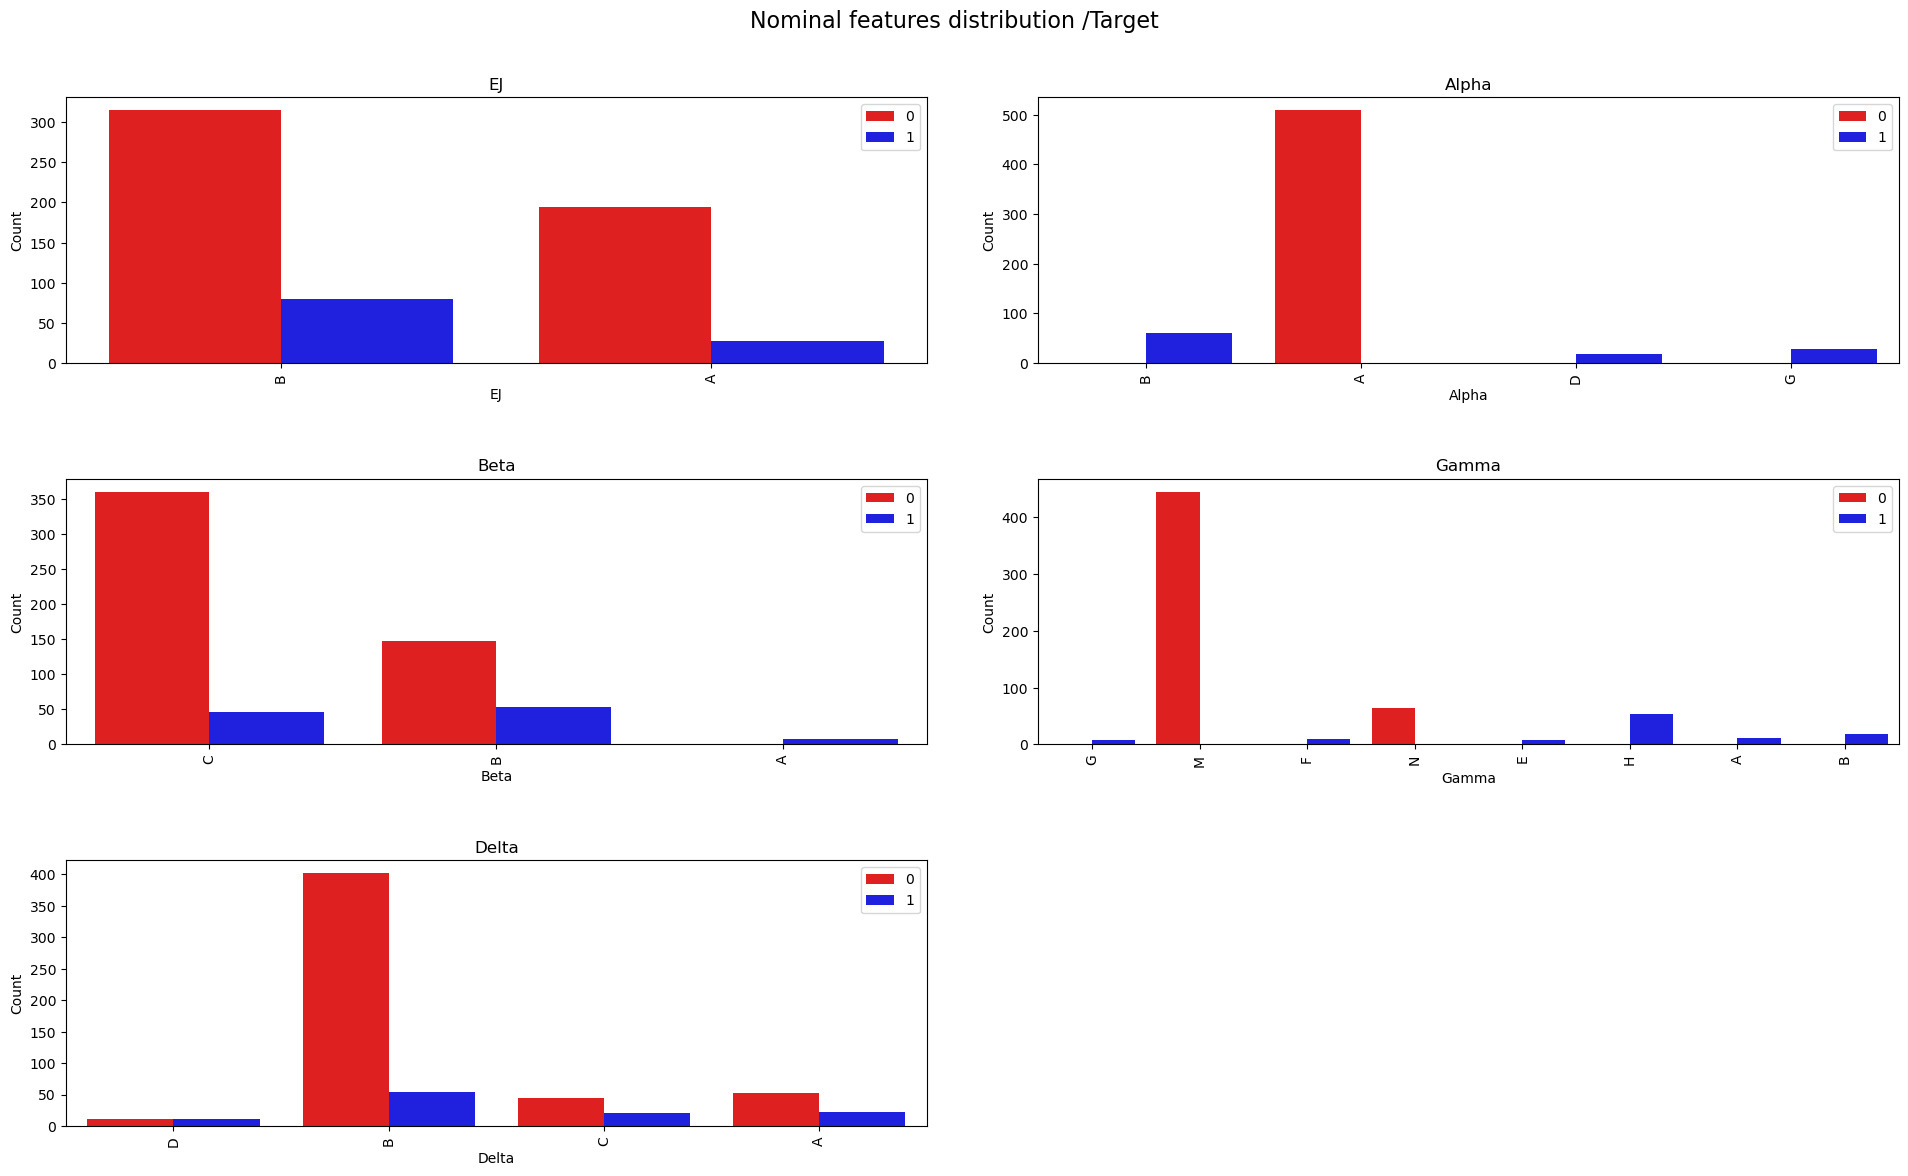

In [32]:
plt.figure(figsize =(20,12))
i = 1
for col in nominal_cols:
    cnt =pd.DataFrame(df_train_greeks[col].value_counts().reset_index())
    t = df_train_greeks.loc[df_train_greeks[col].isin(cnt['index'])]
    plt.subplot(3,2,i)
    sns.countplot(data =t, x =col,hue ='Class',palette=['r','b'])
    
    plt.legend(loc = 'upper right')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.xticks(rotation =90)
    plt.title(col)
    i+=1
    print(df_train_greeks.groupby([col]).Class.mean(),'\n')
plt.tight_layout(pad =4)
plt.suptitle('Nominal features distribution /Target', fontsize =16, y=1.01)
plt.show()

## 2.4. Target Distribution

First, let's first calculate the frequency table for those have one or more of any of the three medical conditions (Class 1), or none of the three medical conditions (Class 0). Secondly, we will generate the percentages in each group. Finaly, I will do a visualisation to show the distribution of our target.

#### *Frequency Table of Class*

In [ ]:
freq_tab = pd.crosstab(index = train_raw["Class"],  # Make a crosstab
                     columns="Total")                  # Name the count column
freq_tab

#### *Percentage Table of Class*

In [ ]:
my_tab = pd.crosstab(index = train_raw["Class"],  # Make a crosstab
                     columns="Percentage")                  # Name the count column

my_tab/my_tab.sum()*100 # Calculate the percentages 

#### *Visualisation of Class*

In [ ]:
#define data
data_targ = [17.5 , 82.5]
labels = ['Has medical condition', 'No medical condition']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:50]

#create pie chart
plt.pie(data_targ, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

⎈ In the train dataset only 18% subjects have been diagnosed with one the three conditions.

⎈ This look like an imbalance data as the number of people who has one or more of any of the three medical conditions is quite smaller than people with none of the three medical conditions.

## 2.4. Relationship between Target and Features

Let's see the distribution of our features among people who has one or more of any of the three medical conditions and  those with none of the three medical conditions.

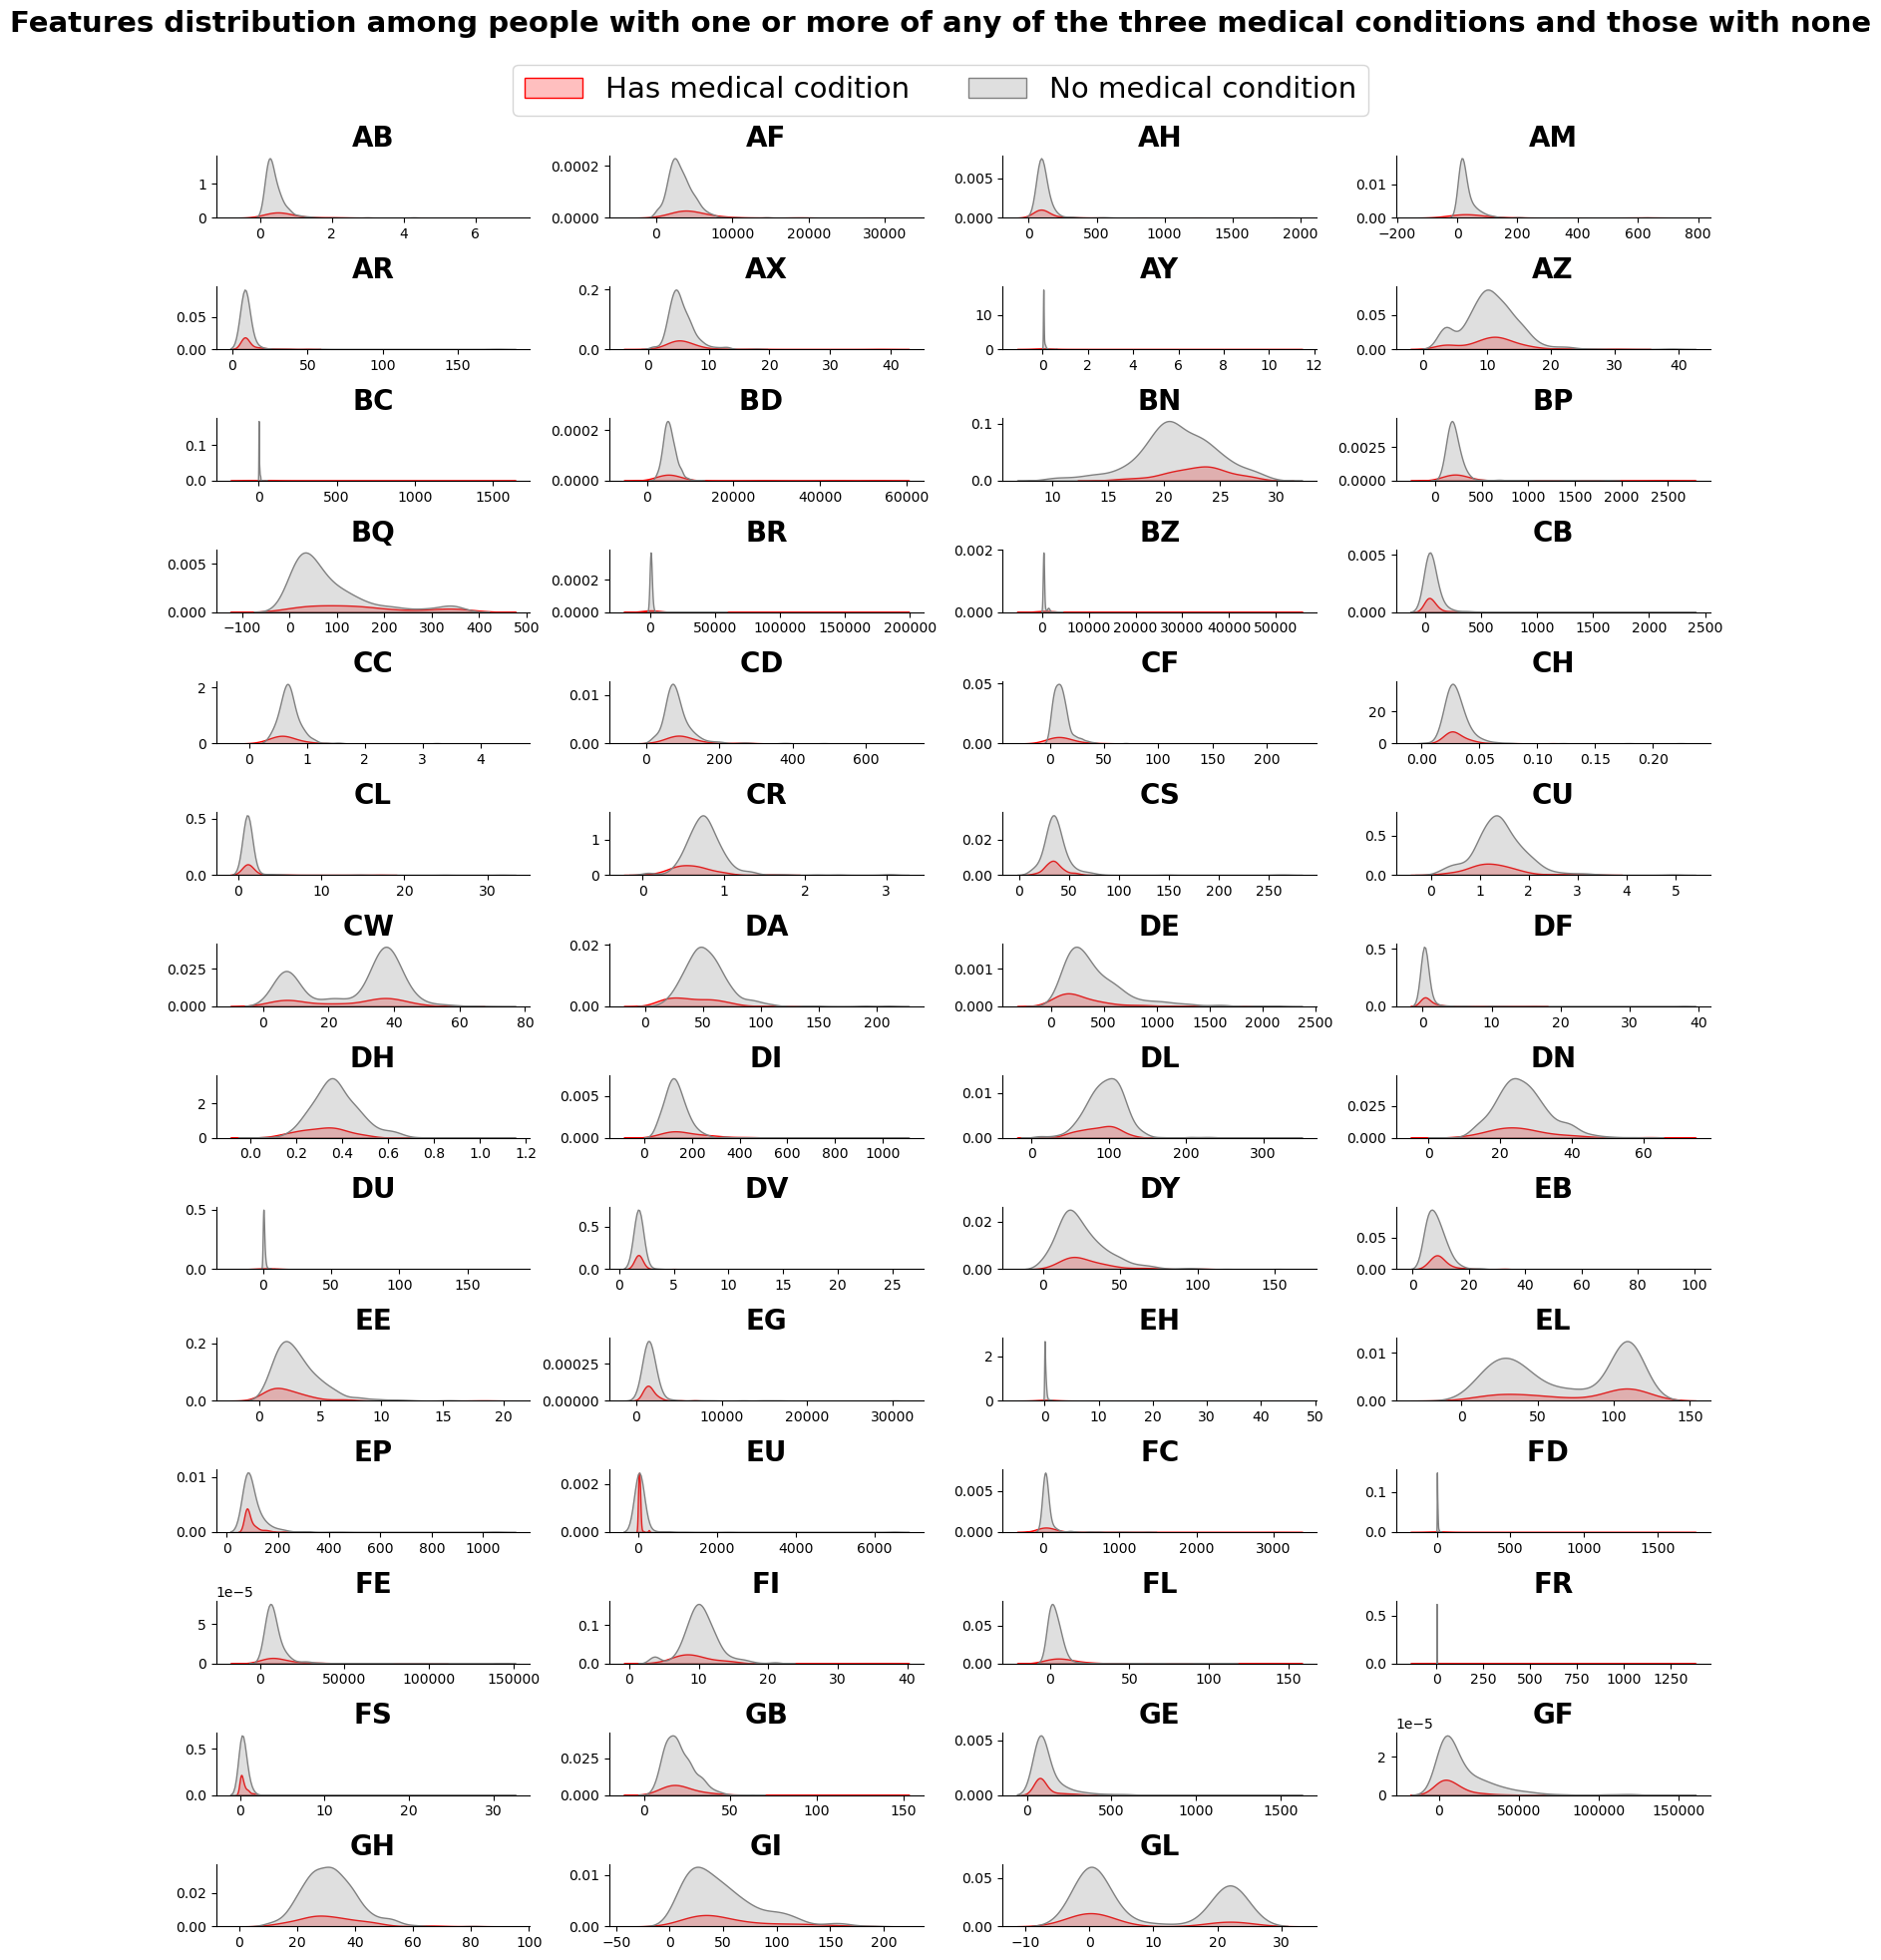

In [18]:
figsize = (4*4, 20)
fig = plt.figure(figsize=figsize)
for idx, col in enumerate(numericalFeatures):
    ax = plt.subplot(14,4, idx + 1)
    sns.kdeplot(
        hue='Class',
        data=train_raw, fill=True,
        x=col, palette=["Gray", "Red"], legend=False
    )
            
    ax.set_ylabel(''); ax.spines['top'].set_visible(False), 
    ax.set_xlabel(''); ax.spines['right'].set_visible(False)
    ax.set_title(f'{col}', loc='center', 
                 weight='bold', fontsize=20)

fig.suptitle(f'Features distribution among people with one or more of any of the three medical conditions and those with none\n\n\n', ha='center',  fontweight='bold', fontsize=21)
fig.legend(['Has medical codition', 'No medical condition'], loc='upper center', bbox_to_anchor=(0.5, 0.96), fontsize=21, ncol=3)
plt.tight_layout()
plt.show()

The distribution of the data confirmed the imbalance distribution of our features and target.

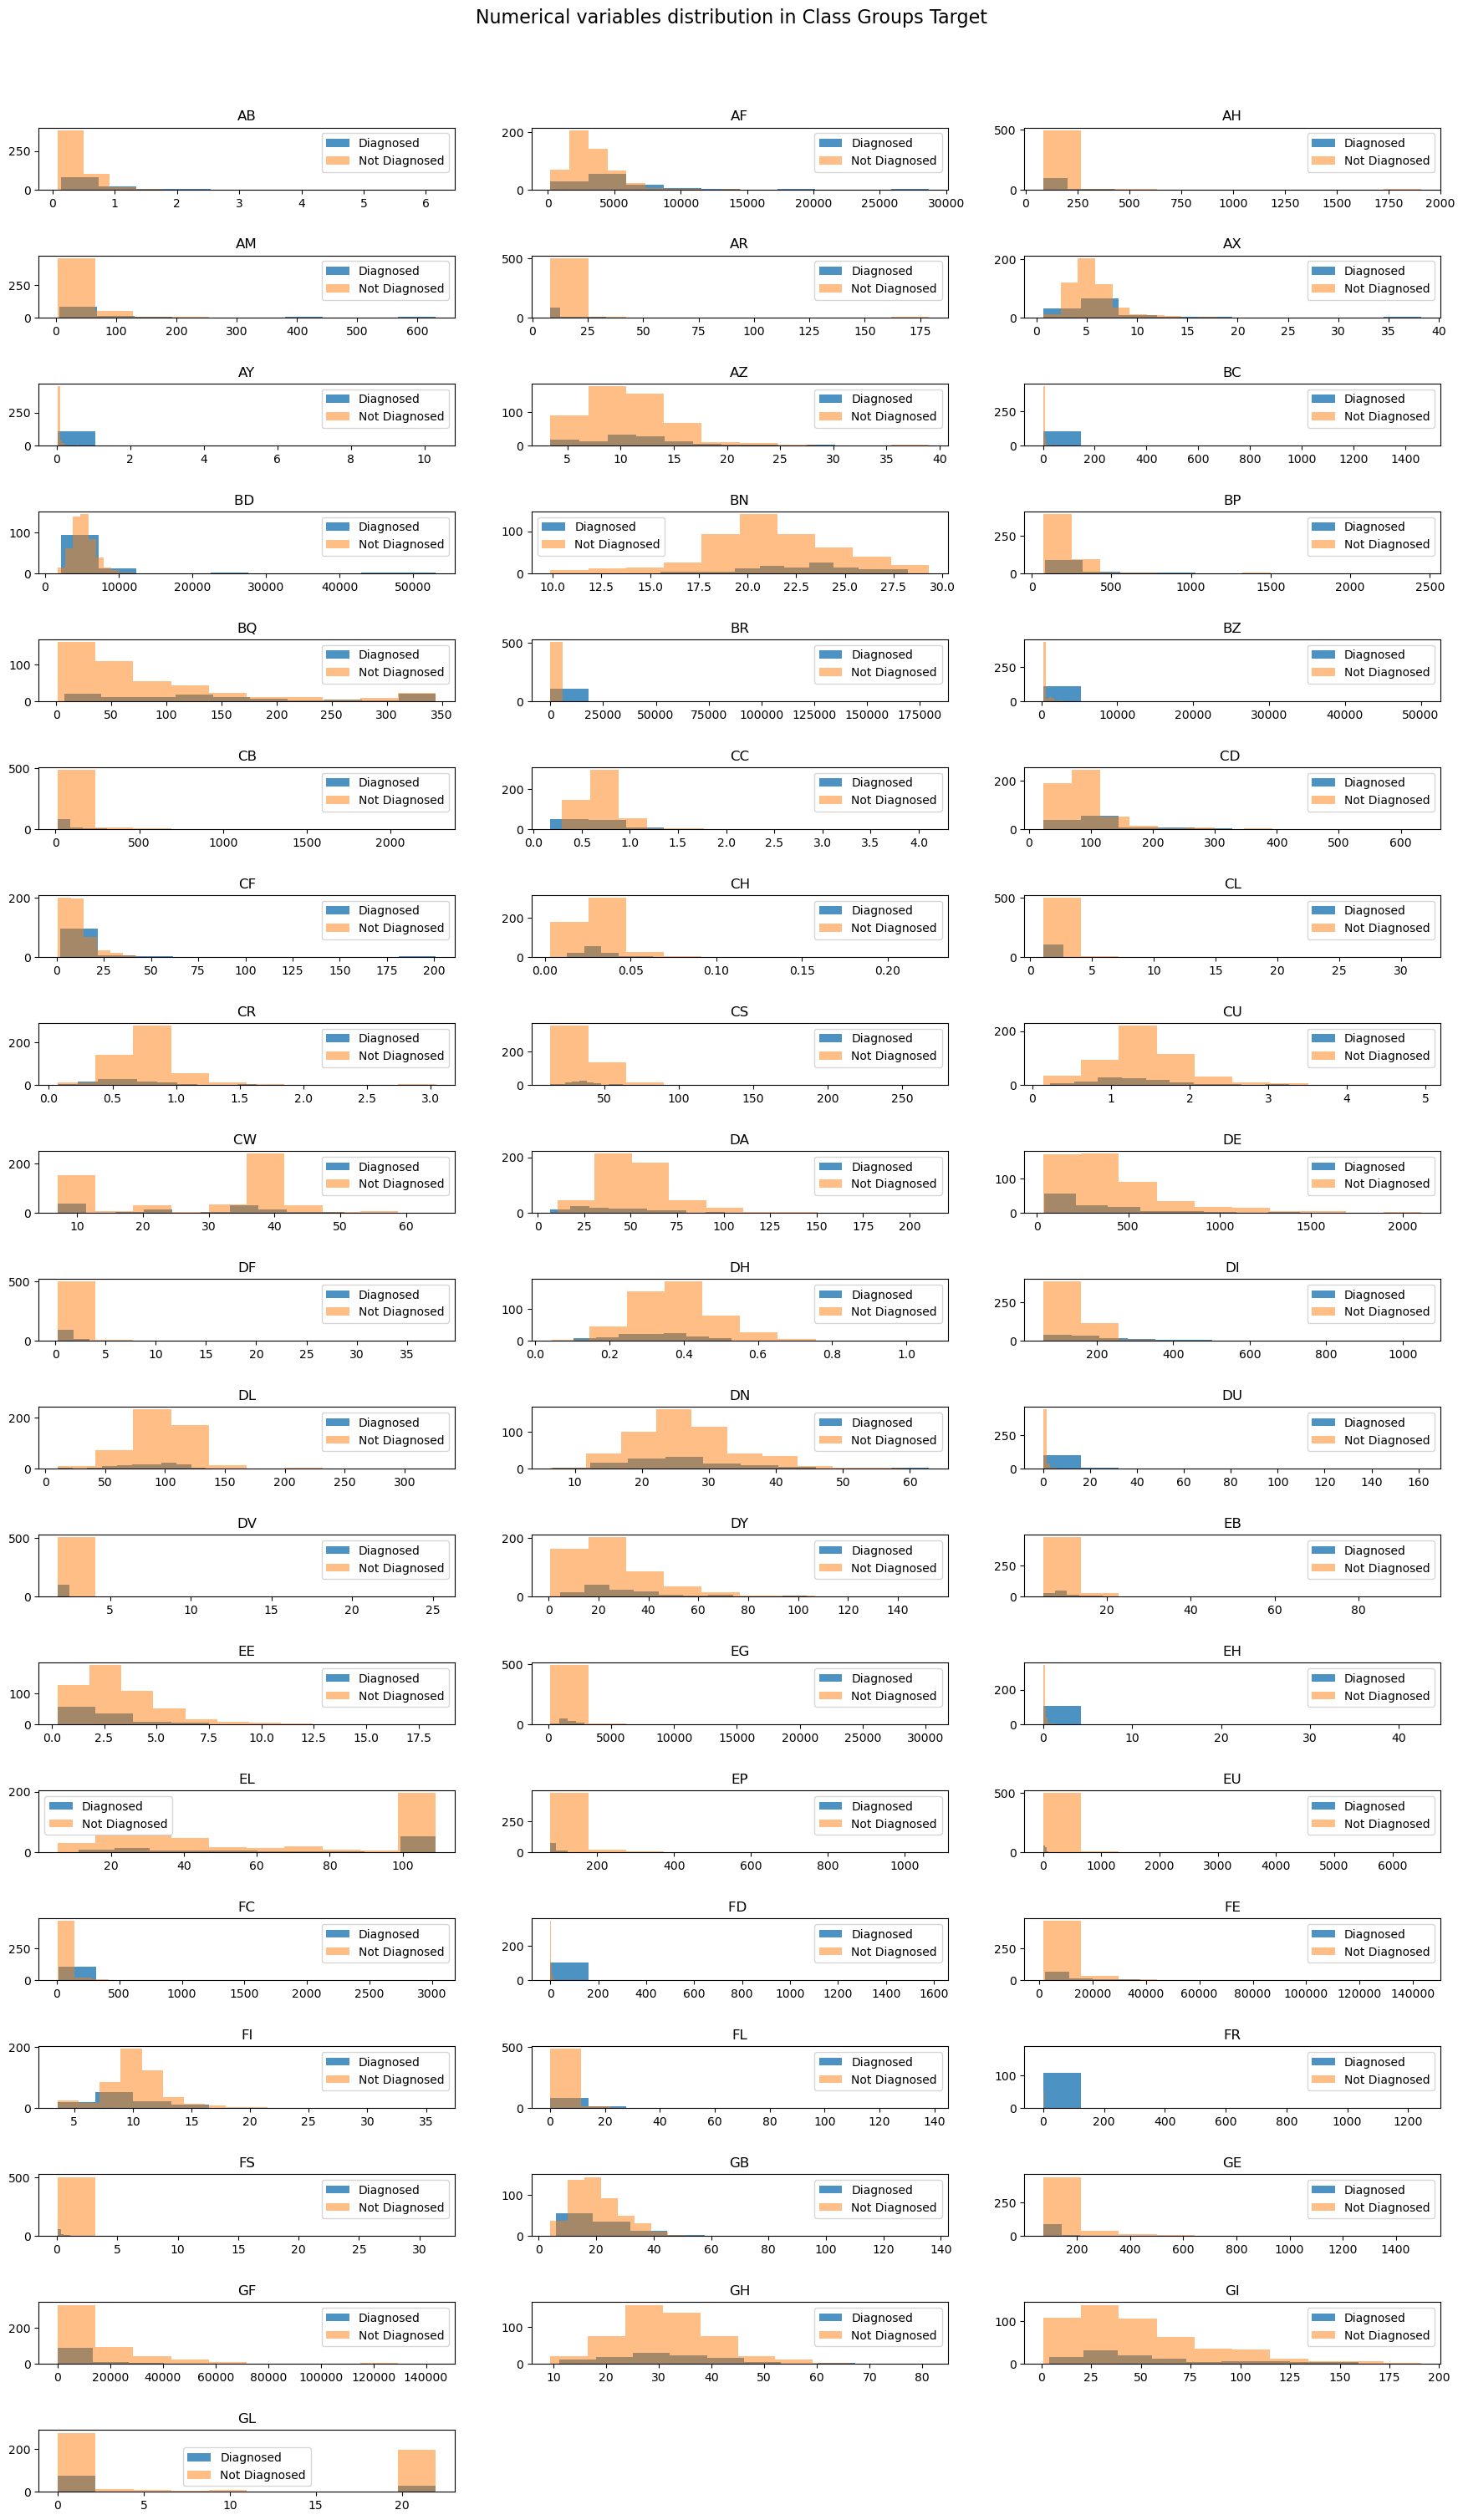

	 Class Rate

AB
(0.132, 0.735]    0.146435
(0.735, 1.338]    0.295082
(1.338, 1.941]    0.500000
(1.941, 2.544]    0.833333
(2.544, 3.147]    0.500000
(3.147, 3.75]          NaN
(3.75, 4.353]     0.000000
(4.353, 4.956]    1.000000
(4.956, 5.559]         NaN
(5.559, 6.162]    1.000000
Name: Class, dtype: float64 

AF
(192.593, 3042.153]       0.096429
(3042.153, 5891.712]      0.206107
(5891.712, 8741.272]      0.380952
(8741.272, 11590.831]     0.625000
(11590.831, 14440.39]     1.000000
(14440.39, 17289.95]      0.000000
(17289.95, 20139.509]     1.000000
(20139.509, 22989.069]         NaN
(22989.069, 25838.628]         NaN
(25838.628, 28688.188]    1.000000
Name: Class, dtype: float64 

AH
(85.2, 200.474]         0.117347
(200.474, 315.748]      0.388889
(315.748, 431.022]      0.333333
(431.022, 546.296]      0.500000
(546.296, 661.57]       0.000000
(661.57, 776.845]            NaN
(776.845, 892.119]      1.000000
(892.119, 1007.393]          NaN
(1007.393, 1122.667]         NaN


In [34]:
##  Distribution on target
i=1
f= plt.figure(figsize =(18,30))
Class_rates =[]

for col in num_cnt_cols:
    plt.subplot(19,3,i)
    n,bins,patchs = plt.hist(df_train_greeks[col].loc[df_train_greeks['Class'] ==1],
                            label =['Diagnosed'],alpha =0.8)
    plt.hist(df_train_greeks[col].loc[df_train_greeks['Class'] ==0],
                            label =['Not Diagnosed'],alpha =0.5)
    plt.title(col)
    plt.legend()
    i+=1
    
    #Survival rate
    Class_rates.append(pd.concat([pd.cut(df_train_greeks[col],bins),df_train_greeks['Class']],axis = 1).groupby([col]).Class.mean())


f.suptitle('Numerical variables distribution in Class Groups Target',fontsize=16, y=1.01)
plt.tight_layout(pad =2.5)
plt.show()

print('\t Class Rate\n')
for cl in Class_rates:
    print(cl,'\n')

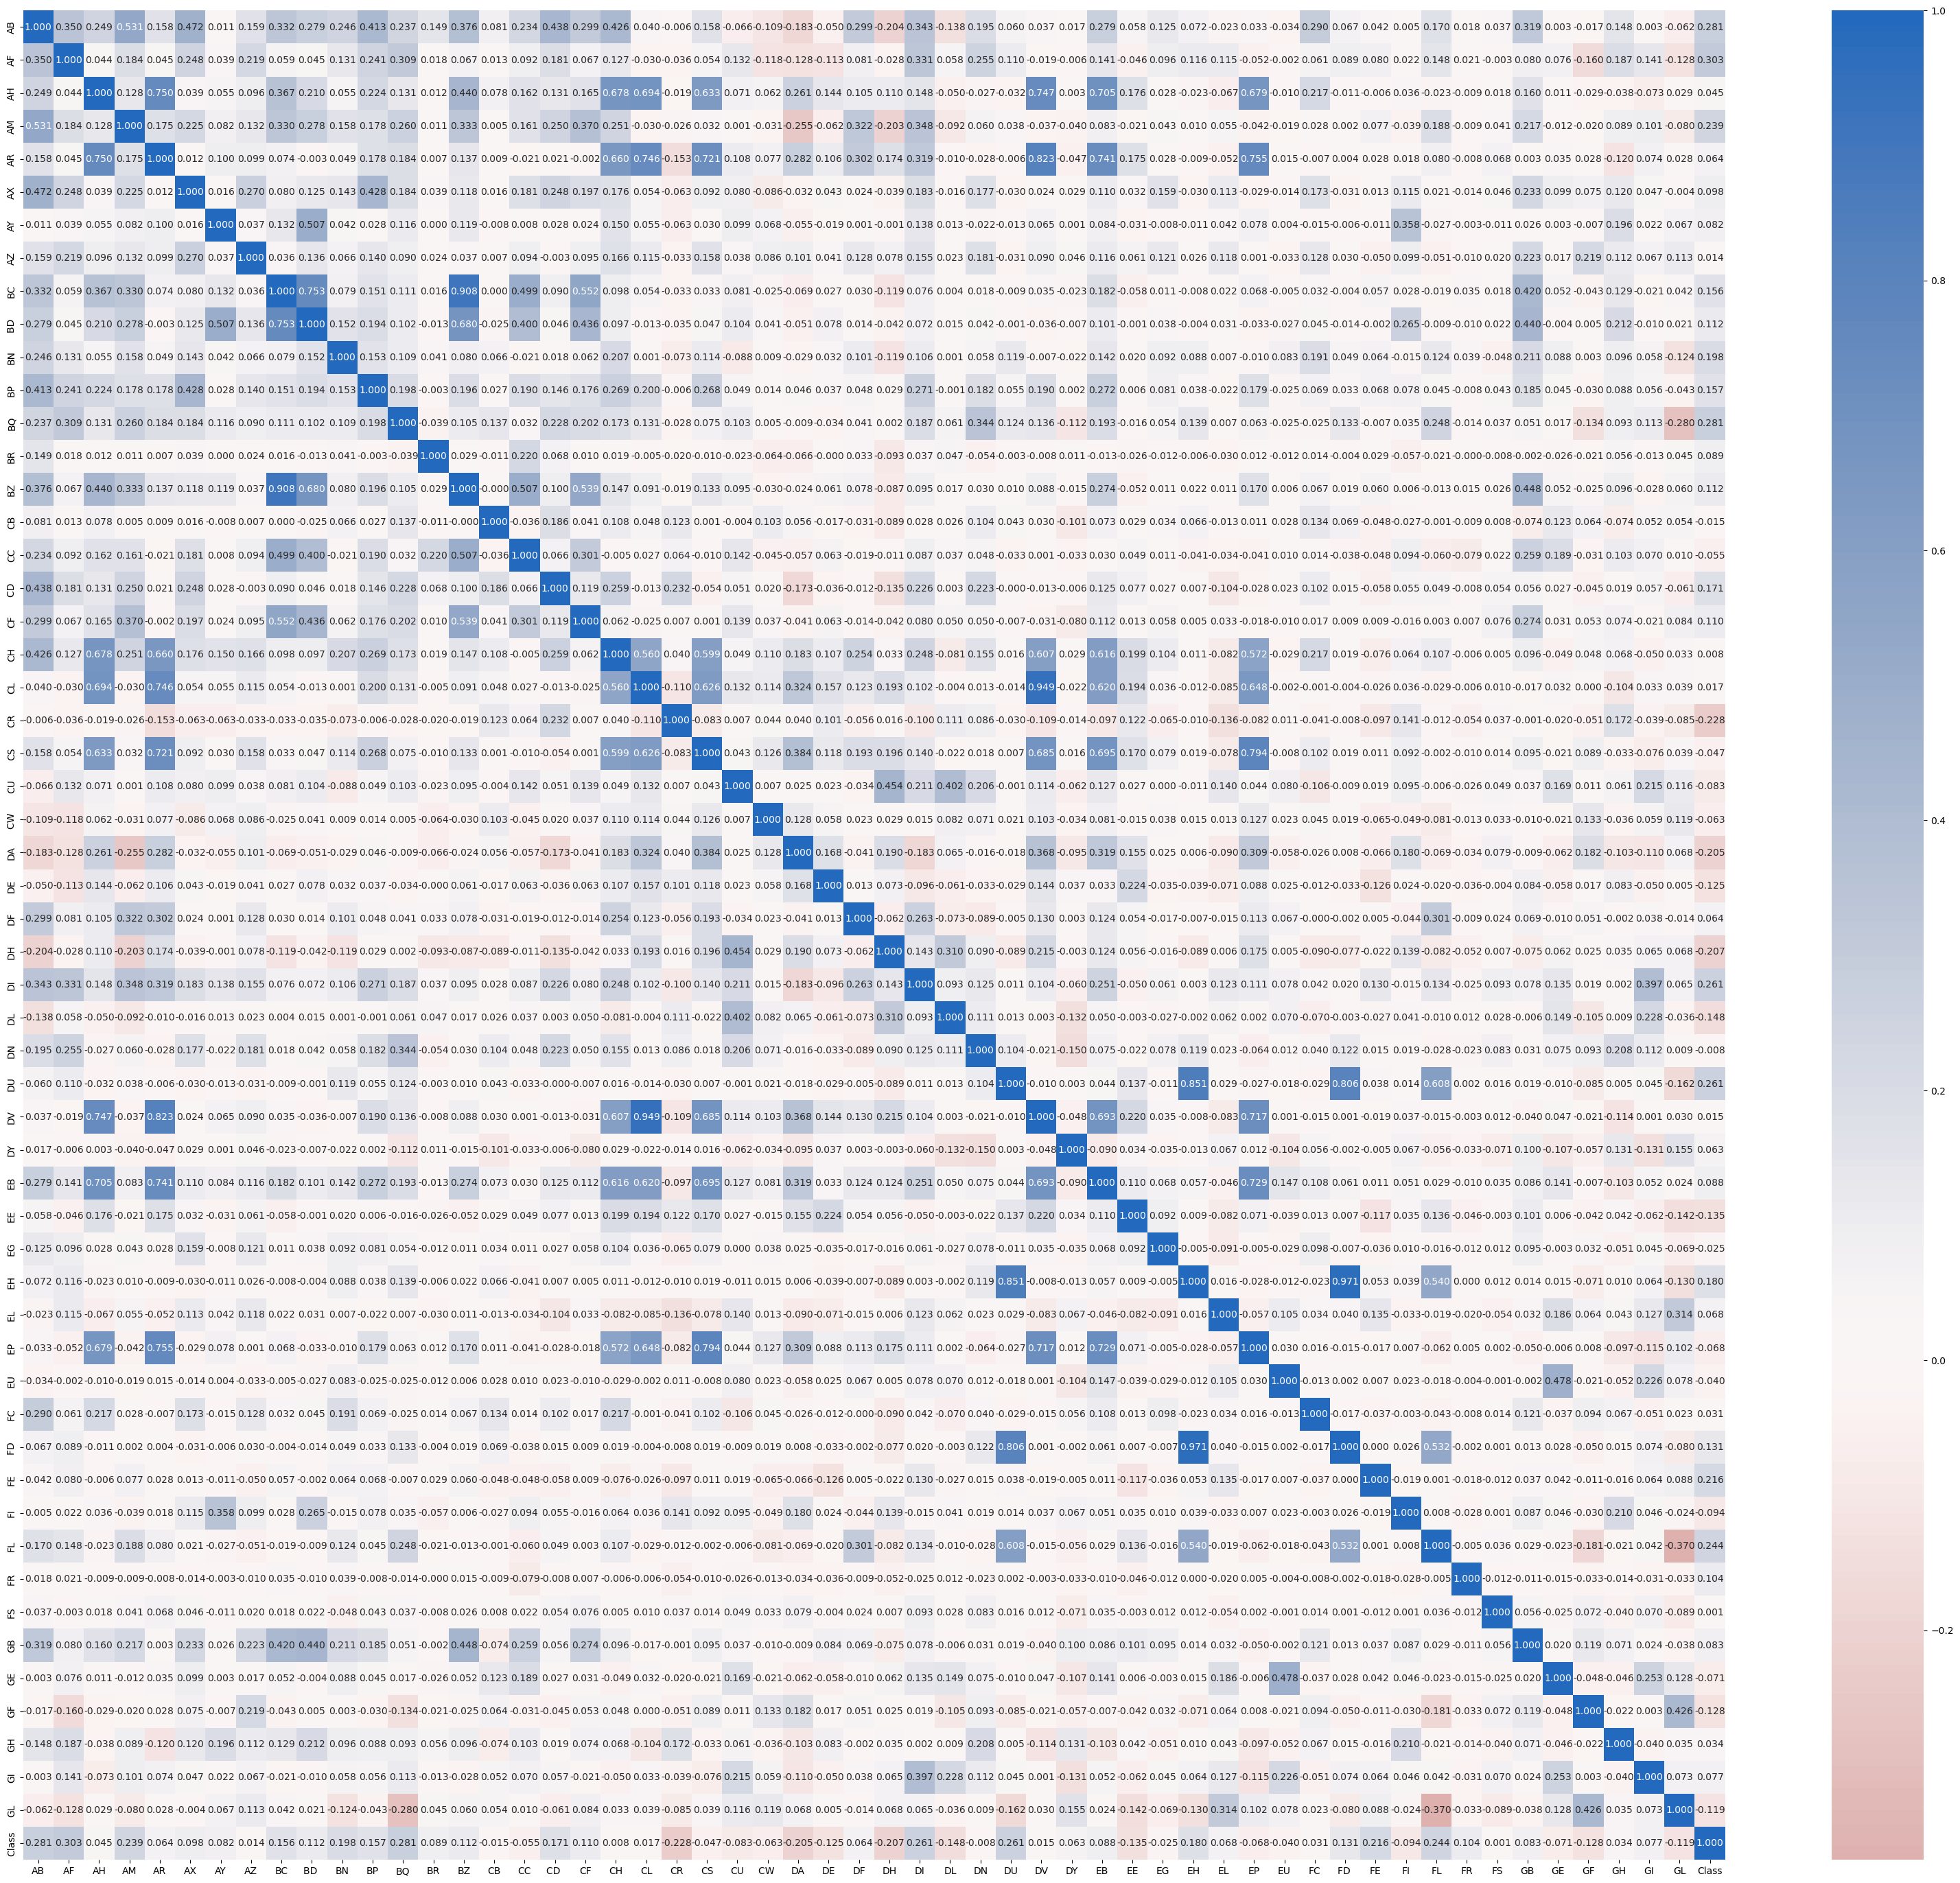

In [29]:
#Let's check the correlation between features
# correlation plot
plt.figure(figsize = [40, 35])
sns.heatmap(df_train_greeks[num_cols].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

In [30]:
df_train_greeks.describe(include='O')

,Id,EJ,Alpha,Beta,Gamma,Delta,Epsilon
count,617,617,617,617,617,617,617
unique,617,2,4,3,8,4,198
top,000ff2bfdfe9,B,A,C,M,B,Unknown
freq,1,395,509,407,445,456,144


## 2.5. Data Wrangling

### 2.5.1. Missing Data

#### 2.5.1.1. Missing data exploration

Let's identify any missing value. Depending on the extend, we will decide on droping the variable or imput the data based on the missingness mecanism.

In [ ]:
mis_data_count = train_raw.isnull().sum()
mis_data_percent = train_raw.isnull().sum() / len(train_raw) * 100

missing_dataframe = pd.DataFrame({
    'Count': mis_data_count,
    'Percent': mis_data_percent
})



missing_dataframe = missing_dataframe[missing_dataframe.Count > 0]
missing_dataframe.sort_values(by='Count', ascending=False, inplace=True)

print(f"⎆ There are {missing_dataframe.shape[0]} features having missing data.\n")
print("⎆ Top 10 missing value features:")
missing_dataframe.head(10)

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(y=missing_dataframe.index,
            x=missing_dataframe.Percent,
            palette='GnBu_r')
title = plt.title("Missing Values")
plt.show()

#### 2.5.1.2. Missing Data Imputation

Giving that all these variables missing variables are numeric variables, I will impute them with their medians because 
the distribution of these data values are skewed. 

In [ ]:
specific_vars = [
    'BQ', 'EL', 'CC', 'CB', 'FS', 'DU', 'FC', 'FL', 'GL'
]

imputer = SimpleImputer(missing_values=np.NaN, strategy='median')

train_raw[specific_vars] = pd.DataFrame(imputer.fit_transform(train_raw[specific_vars]), index=train_raw.index)

Now, let's verify if there are still missing data in our dataset. 

In [ ]:
sum(train_raw.isnull().sum())

⎆ There is now no missing data in our train data. 

### 2.5.2. Data Spliting and Scaling

In [ ]:
# convert categorical data in numerical for categorical column
train_raw['EJ'] = train_raw['EJ'].replace({'A': 0, 'B': 1})
test['EJ'] = test['EJ'].replace({'A': 0, 'B': 1})

In [ ]:
# data spliting
X_train = train_raw.drop(['Id','Class'], axis=True)
y_train = train_raw['Class']

X_test = test.drop('Id', axis=True)

In [ ]:
# data standarization 
sc=StandardScaler()
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train))

In [ ]:
X_train_scaled

### 2.5.3. Data Balancing

In [ ]:
oversample = RandomOverSampler(random_state=0)
X_train_balanced, y_train = oversample.fit_resample(X_train_scaled, y_train)
# summarize distribution
counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y_train) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [ ]:
print("X_train.shape:", X_train.shape)
print("X_train_scaled.shape:", X_train_scaled.shape)
print("X_train_balanced.shape:", X_train_balanced.shape)
print("y_train.shape:", y_train.shape)

In [ ]:
pd.DataFrame(X_train_balanced)

# 3. Data Modelling

## 3.1. Logistic Regression

In [ ]:
iard_mod = LogisticRegression(random_state=0)
iard_mod.fit(X_train_balanced, y_train)

In [ ]:
# LogisticRegression
iard_mod = LogisticRegression(random_state=0)
iard_mod.fit(X_train_balanced, y_train)

In [ ]:
y_pred2 = iard_mod.predict(X_test)

In [ ]:
# Prediction
y_pred = iard_mod.fit(X_train_balanced, y_train.values)
y_pred = pd.DataFrame(iard_mod.predict(X_test))
y_pred.head(10)

In [ ]:
acc = accuracy_score(y_train, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

In [ ]:

y_pred = iard_mod1.predict(X_test)
y_pred

In [ ]:
acc = accuracy_score(y, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

## 3.2. 